In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.utils import plot_model

In [ ]:
# Set the number of classes in your dataset
num_classes = 2

In [ ]:
# Define the base model
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

234698864/234698864 [==============================] - 1s 0us/step


In [ ]:
# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Load and preprocess the data
train_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
val_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.580944 to fit



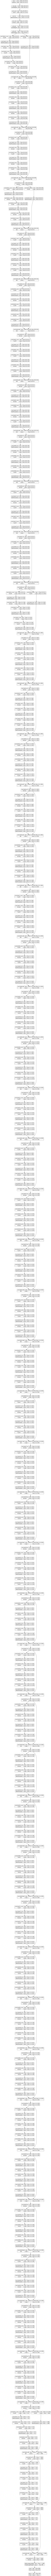

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples/train_generator.batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples/val_generator.batch_size)

<ipython-input-13-7d1a1c61692c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
26/26 [==============================] - 644s 25s/step - loss: 0.7572 - accuracy: 0.5179 - val_loss: 0.8981 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 590s 23s/step - loss: 0.7184 - accuracy: 0.5298 - val_loss: 0.7169 - val_accuracy: 0.5111
Epoch 3/10
26/26 [==============================] - 638s 24s/step - loss: 0.7029 - accuracy: 0.5464 - val_loss: 0.6789 - val_accuracy: 0.5333
Epoch 4/10
26/26 [==============================] - 593s 23s/step - loss: 0.6895 - accuracy: 0.5583 - val_loss: 0.6904 - val_accuracy: 0.5500
Epoch 5/10
26/26 [==============================] - 639s 24s/step - loss: 0.6864 - accuracy: 0.5512 - val_loss: 0.6986 - val_accuracy: 0.5389
Epoch 6/10
26/26 [==============================] - 631s 24s/step - loss: 0.6791 - accuracy: 0.5452 - val_loss: 0.7018 - val_accuracy: 0.5278
Epoch 7/10
26/26 [==============================] - 594s 23s/step - loss: 0.6621 - accuracy: 0.6083 - val_loss: 0.6695 - val_accuracy: 0.6222
Epoch 

In [ ]:
# Evaluate the model on the test data
score = model.evaluate_generator(test_generator, test_generator.samples/test_generator.batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Evaluate the model on the validation data
val_score = model.evaluate_generator(val_generator, val_generator.samples/val_generator.batch_size)
print('Validation loss:', val_score[0])
print('Validation accuracy:', val_score[1])